In [ ]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
df = pd.read_csv('Data_files/df_w_movie_book.csv') 
df.head()

,name,species,gender,house,blood,HP1,HP2,HP3,HP4,HP5,HP6,HP7,Hogwarts Mystery (video game),FBaWtFT (film),FBaWtFT_CoG (film),tToBtB
0,1992 Gryffindor vs Slytherin Quidditch match s...,unknown,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hannah Abbott,Human,Female,Hufflepuff,Half-blood,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Hannah Abbott's mother,Human,Female,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ernestina Abutor,Human,Female,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zoe Accrington,Human,Female,Slytherin,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
with open('Data_files/attributes.json') as json_file:
    attributes = json.load(json_file)

with open('Data_files/links.json') as json_file:
    links = json.load(json_file)

In [ ]:
# Colormaps
house_col_map = {'Hufflepuff': "#FFDB00",
           'Slytherin': '#1A472A',
           'Gryffindor': '#AE0001',
           'Ravenclaw':'#222F5B',
           'Thunderbird':'grey',
           'Pukwudgie':'grey',
           'Horned':'grey',
           'Wampus':'grey'}

house_secondary_col_map = {'Hufflepuff': '#60605C',
           'Slytherin': '#AAAAAA',
           'Gryffindor': '#EEBA30',
           'Ravenclaw':'#946B2D',
           'Thunderbird':'darkgrey',
           'Pukwudgie':'darkgrey',
           'Horned':'darkgrey',
           'Wampus':'darkgrey'}
           
# get node and edge colours
def get_house_colours(G):
    '''
    Input: networkx graph
    Output: dictionaries with node colour and edge colours
    
    The function takes a graph as input and it assignes the node colour and 
    edge colour depending on a node's 'Role'
    '''
    node_att = {}
    #edge_att = {}

    for u, a in list(G.nodes(data = True)):#for u, v, a in list(G.edges(data = True)):
        if (a['house'] == 'Hufflepuff'): 
            #node colour
            node_col = house_col_map['Hufflepuff']
            # edge colour
            #if (G.nodes[v]['house'] == 'Hufflepuff'):
            #    edge_col = 'blue'
            #else:   
            #    edge_col = 'black'
        
        elif (a['house'] == 'Slytherin'):
            #node colour
            node_col = house_col_map['Slytherin']
            #egde colour
            #if (G.nodes[v]['house'] == 'Slytherin'):
            #    edge_col = 'green'
            #else:   
            #    edge_col = 'black' 
                
        elif (a['house'] == 'Ravenclaw'):
            #node colour
            node_col = house_col_map['Ravenclaw']
            #edge colour
            # if (G.nodes[v]['house'] == 'Ravenclaw'):
            #     edge_col = 'orange'
            # else:   
            #     edge_col = 'black'
        
        elif (a['house'] == 'Gryffindor'):
            #node colou            
            node_col = house_col_map['Gryffindor']
            #edge colour
            #if (G.nodes[v]['house'] == 'Gryffindor'):
            #    edge_col = 'maroon'
            #else:   
            #    edge_col = 'black'
                
        else:
            node_col = 'grey'
            #edge_col = 'purple'

        #edge_att[(u, v)] = {'EdgeColour': edge_col} 
        node_att[u] = {'color': node_col}  
    
    return node_att #, edge_att

In [ ]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode = False,  
                        adjustSizes = False,
                        #edgeWeightInfluence = 0.1,

                        # Performance
                        jitterTolerance = 1.0,  # Tolerance
                        barnesHutOptimize = True,
                        barnesHutTheta = 1.2,
                        multiThreaded = False,

                        # Tuning
                        scalingRatio=0.001,
                        strongGravityMode=False,
                        gravity=2, # attracts nodes to the center

                        # Log
                        verbose=True)

### Interactive graph

100%|██████████| 1000/1000 [00:00<00:00, 4397.37it/s]
BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.11  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


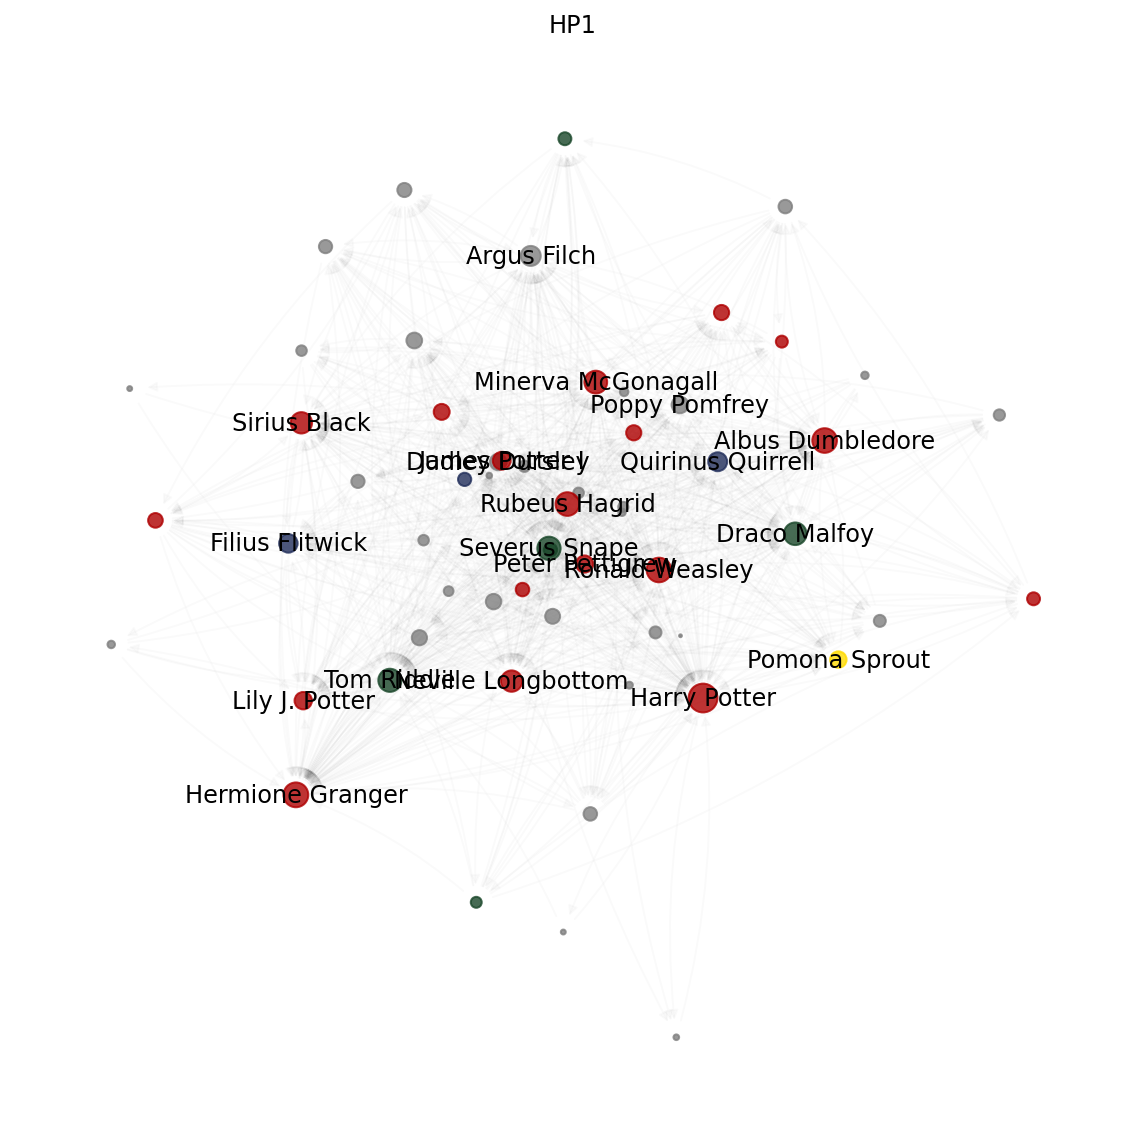

In [ ]:
title = "HP1"

# Get the links for Harry Potter 1
names_subset = list(df[df[title]==1].name)
hp1_links = {key:val for key,val in links.items() if key in names_subset}

for key in hp1_links.keys():
    vals = hp1_links[key]
    vals_in_list = []
    for v in vals: 
        if v in names_subset:
            vals_in_list.append(v)
    hp1_links[key] = vals_in_list

# add nodes and edges from dictionary 
G = nx.DiGraph(hp1_links)

# add node attributes
nx.set_node_attributes(G, attributes)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos = None, iterations = 1000)

# Define prioritized nodes to show labels
high_degree_names = sorted(G.degree, key=lambda x: x[1], reverse=True)[0:20]
high_degree_names = [n for n,v in high_degree_names]
name_dict = {n:n for n in G.nodes if n in high_degree_names}

# Set attribuets
node_att = get_house_colours(G)
nx.set_node_attributes(G, node_att)

# get node size
degrees = dict(G.degree)
degrees.update((key, value*2) for key, value in degrees.items())
nx.set_node_attributes(G, degrees, 'size')
node_colours = list(nx.get_node_attributes(G,'color').values())
weights = list(nx.get_node_attributes(G,'size').values())

plt.figure(figsize = (10, 10))
ax = plt.gca()
ax.set_title(title)
nx.draw_networkx_nodes(G, positions, node_size=weights, 
                        node_color=node_colours, alpha=0.8)
nx.draw_networkx_labels(G,positions, name_dict, font_color = 'black', font_size = 12)
nx.draw_networkx_edges(G, positions, alpha = 0.02,connectionstyle="arc3,rad=0.1") #edge_color= edge_colours, alpha=0.05)
plt.axis('off')
plt.show()

In [6]:
import pickle
import networkx as nx
import pandas as pd
def load_graph():
    with open("pages/data/WG.pickle", 'rb') as f:
        G = pickle.load(f)

    Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])

    return G 

In [2]:
G = load_graph()

In [7]:
df = pd.read_csv("pages/data/cleaned_characters_attr.csv")
df = df.set_index("title")
df = df[["Race", "Gender", "Nationality", "Family", "Profession"]]
attributes = df.to_dict('index')
nx.set_node_attributes(G, attributes)

titles = {}
for name, data in G.nodes(data = True):
    try:
        title = 'Race: ' + data['Race'] + ' </br>Gender: ' + data['Gender'] + ' </br>Nationality: ' + data['Nationality'] + ' </br>Family: ' + data['Family'] + ' </br>Profession: ' + data['Profession']
        titles[name] = title
    except:
        pass
nx.set_node_attributes(G, titles, 'title')

degrees = dict(G.degree)
degrees.update((key, value*0.5) for key, value in degrees.items())
nx.set_node_attributes(G, degrees, 'size')


In [16]:
df = df.set_index("title")

In [20]:
df = df[["Race", "Gender", "Nationality", "Family", "Profession"]]

In [23]:
attributes = df.to_dict('index')

In [24]:
nx.set_node_attributes(G, attributes)

In [29]:
titles = {}

for name, data in G.nodes(data = True):
    try:
        title = 'Race: ' + data['Race'] + ' </br>Gender: ' + data['Gender'] + ' </br>Nationality: ' + data['Nationality'] + ' </br>Family: ' + data['Family'] + ' </br>Profession: ' + data['Profession']
        titles[name] = title
    except:
        pass
nx.set_node_attributes(G, titles, 'title')

In [30]:
from pyvis.network import Network

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((10,200))
print(scaler.fit(np.array(list(dict(G.degree).values())).reshape(-1, 1)))

MinMaxScaler(feature_range=(10, 200))


In [94]:
scaler.transform(np.array(100).reshape(1, -1))

array([[54.05152225]])

In [95]:
# update node-size (otherwise it looks way too big)
degrees = dict(G.degree)
degrees.update((key, scaler.transform(np.array(value).reshape(1, -1))) for key, value in degrees.items())
nx.set_node_attributes(G, degrees, 'size')

In [96]:
from pyvis.network import Network

nt = Network(notebook = True,
            height='400px',
            width='50%', 
            bgcolor='#222222', 
            font_color='white',
            heading='Graph title...'
            )

nt.from_nx(G)

nt.barnes_hut(overlap = 0,
                     gravity = -80000, 
                     central_gravity = 0.5,
                     damping = 0.09
                     )
#nt.force_atlas_2based(overlap = 0.5,
 #                    gravity = -100, 
 #                    central_gravity = 0.01,
 #                    damping = 0.4
 #                    )

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('curvedCW') # Curve edges 
nt.show('HP1.html' )

In [36]:
df

,Race,Gender,Nationality,Family,Profession
title,,,,,
Innkeeper,No Race,No Gender,No Nationality,No Family,No Profession
The Witcher journal character entries,No Race,No Gender,No Nationality,No Family,No Profession
Abigail,Human,Female,Temerian,No Family,Witch
Adalbert (soldier),Human,Male,Temerian,No Family,Soldier
Adam (Murky Waters),Human,Male,Temerian,No Family,Poet
...,...,...,...,...,...
Yoana,Human,Female,Skelliger,Clan Tordarroch,Armorer
Yolar,Human,Male,Skelliger,No Family,Druid
Yontek,Human,Male,Temerian,No Family,No Profession


In [40]:
df["Profession"].nunique()

164

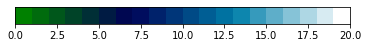

In [54]:
import matplotlib.pyplot as plt

def get_cmap(n, name='ocean'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def main():
    N = 20
    fig=plt.figure()
    ax=fig.add_subplot(111)   
    plt.axis('scaled')
    ax.set_xlim([ 0, N])
    ax.set_ylim([-0.5, 0.5])
    cmap = get_cmap(N)
    for i in range(N):
        rect = plt.Rectangle((i, -0.5), 1, 1, facecolor=cmap(i))
        ax.add_artist(rect)
    ax.set_yticks([])
    plt.show()

if __name__=='__main__':
    main()

In [46]:
get_cmap(10, name='hsv')(0)

(1.0, 0.0, 0.0, 1.0)

In [97]:
cmap = get_cmap(10)

In [107]:
import matplotlib
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#008000
#00551c
#002b39
#000055
#002a71
#00558e
#0080aa
#55aac6
#aad4e3
#ffffff


In [122]:
def get_cmap(n, name='ocean'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [148]:
attributes = nx.get_node_attributes(G,"Gender")
unique_attributes = np.unique(list(attribute.values()))
n_attributes = len(unique_attributes)
cmap = get_cmap(n_attributes)
colors = {}
for name, value in attributes.items():
    index = list(unique_attributes).index(value)
    color = matplotlib.colors.rgb2hex(cmap(index))
    colors[name] = color
nx.set_node_attributes(G, colors, 'color')

ValueError: 'No Gender' is not in list

In [136]:
unique_attributes = np.unique(list(attribute.values()))

In [123]:
n_attributes = len(unique_attributes)

In [124]:
cmap = get_cmap(n_attributes)

In [159]:
hexmap = []
for i in range(n_attributes):
    hexmap.append(matplotlib.colors.rgb2hex(cmap(i)))

In [160]:
hexmap

['#008000',
 '#00700a',
 '#006114',
 '#00521f',
 '#004229',
 '#003333',
 '#00243d',
 '#001447',
 '#000552',
 '#000a5c',
 '#001a66',
 '#002970',
 '#00387a',
 '#004785',
 '#00578f',
 '#006699',
 '#0075a3',
 '#0a85ad',
 '#2994b8',
 '#47a3c2',
 '#66b3cc',
 '#85c2d6',
 '#a3d1e0',
 '#c2e0eb',
 '#e0f0f5',
 '#ffffff']

In [144]:
colors = {}
for name, value in attributes.items():
    index = list(unique_attributes).index(value)
    color = matplotlib.colors.rgb2hex(cmap(index))
    colors[name] = color
nx.set_node_attributes(G, colors, 'color')

In [131]:
list(unique_attributes).index("Dog")

2

In [147]:
df.columns

Index(['Race', 'Gender', 'Nationality', 'Family', 'Profession'], dtype='object')

In [ ]:
    titles = {}
    for name, data in G.nodes(data = True):
        try:
            title = 'Name: ' + name + ' </br>Race: ' + data['Race'] + ' </br>Gender: ' + data['Gender'] + ' </br>Nationality: ' + data['Nationality'] + ' </br>Family: ' + data['Family'] + ' </br>Profession: ' + data['Profession']
            titles[name] = title
        except:
            pass
    nx.set_node_attributes(G, titles, 'title')

In [156]:

for node in G.nodes():
    G[node]['color'] = "No "

TypeError: 'AtlasView' object does not support item assignment

In [154]:
G["

'Innkeeper'